### Import Libraries

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

### Inspect Data

In [4]:
df.head()
#There are three scores. May create an additional score 
#  that averages all three. Each of the scores will be a target 
#  variable/feature


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()
# There are 1000 rows of data and 8 columns/features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# Create a final/overall score from math, reading, and writing

df['overall score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Data Exploration: Overall Performance by Gender and (Race/ethnicity, Parental level of education, lunch type, and test preparation


C:\Users\eadew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


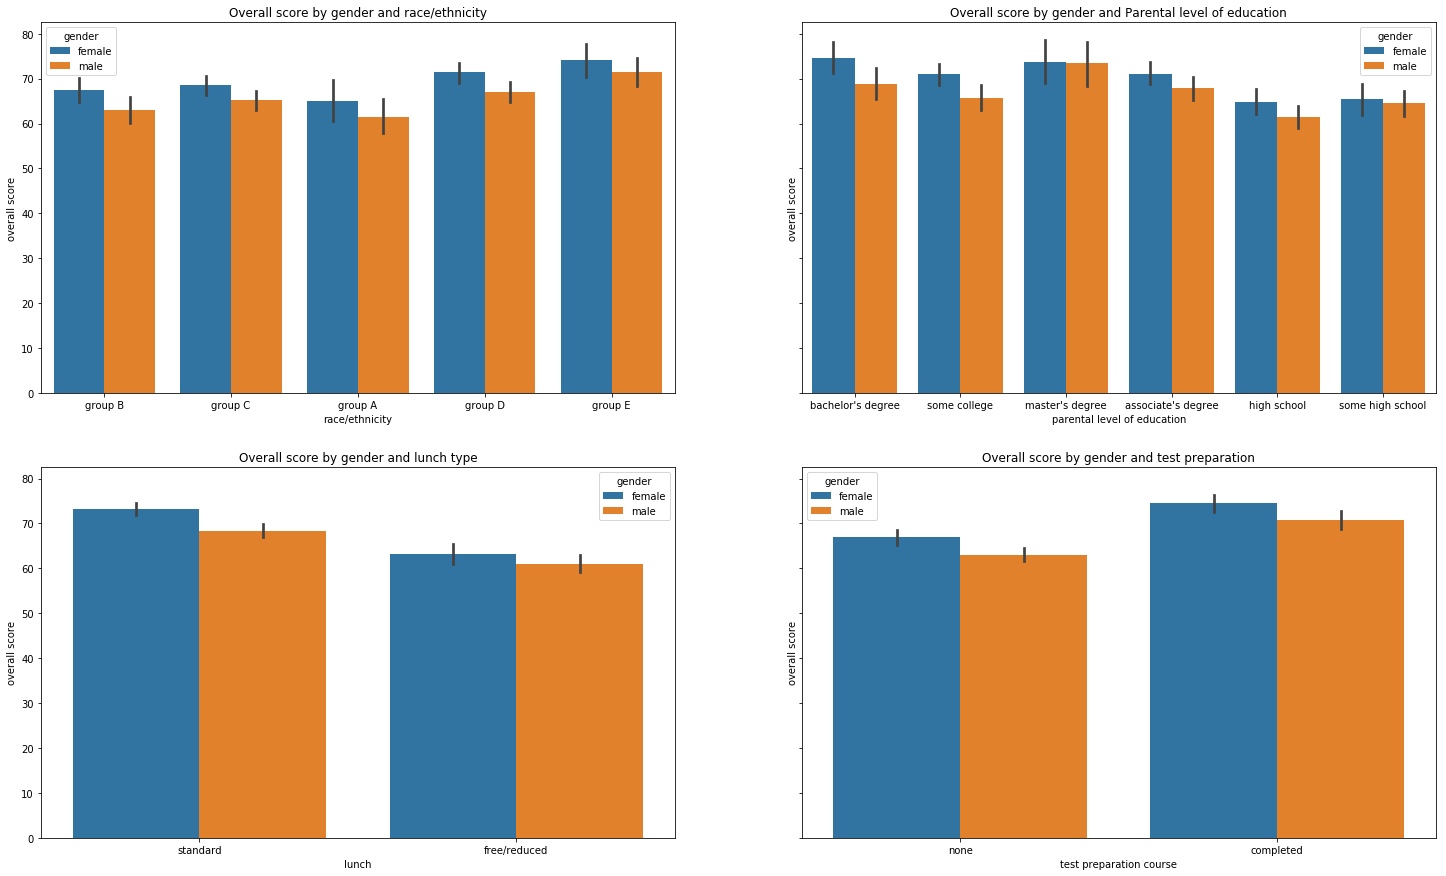

In [9]:
#Explore scores by parental level of education
fig, axs = plt.subplots(ncols=2, nrows=2,  figsize=(25, 15), sharey = True)
sns.barplot(x=df['race/ethnicity'], y=df['overall score'], hue=df['gender'], ax=axs[0][0]).set_title('Overall score by gender and race/ethnicity')
sns.barplot(x=df['parental level of education'], y=df['overall score'], hue=df['gender'], ax=axs[0][1]).set_title('Overall score by gender and Parental level of education')
sns.barplot(x=df['lunch'], y=df['overall score'], hue=df['gender'], ax=axs[1][0]).set_title('Overall score by gender and lunch type')
sns.barplot(x=df['test preparation course'], y=df['overall score'], hue=df['gender'], data=df, ax=axs[1][1]).set_title('Overall score by gender and test preparation')

plt.show()

#### Transformation of non-normal, target features: Math, Reading and writing

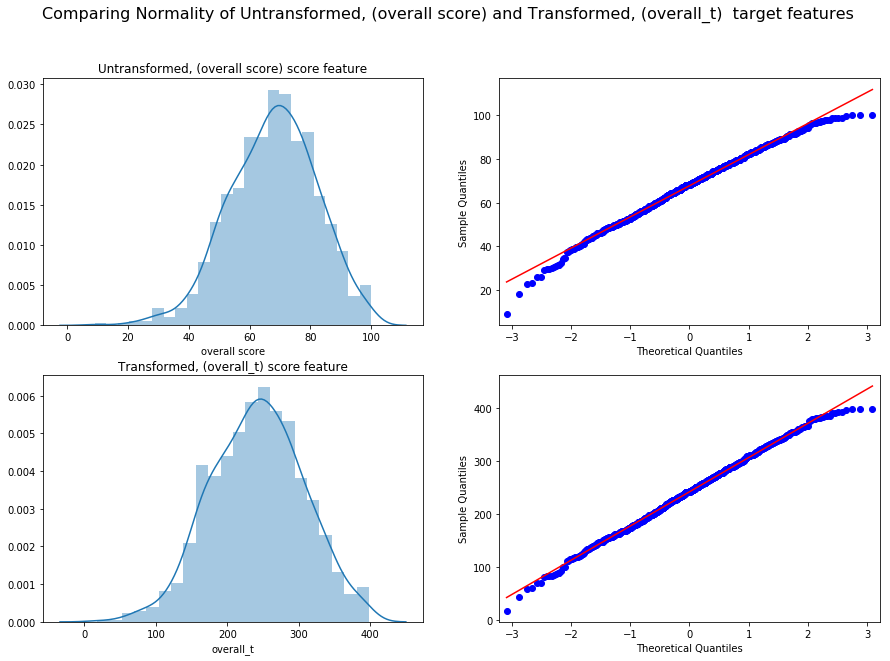

<Figure size 360x3600 with 0 Axes>

overall score - Reject null. Not normal
p=0.0005 

overall_t - Fail to reject null. Normal
p=0.2498 



In [10]:
#Transform the math score to normalize it.
import math as m

#Test of Normality for the Math score
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

def transform_vars(untransformed, transformed):
    # Transformation of math score
    x = lambda x: (m.pow(x,1.3))
    df_t = df['{}'.format(untransformed)].apply(x)
    df['{}'.format(transformed)] = pd.Series(df_t, index=df.index) 

    
# Plot both Untransformed and Transformed plots of test performance
def compare_normality(untransformed, transformed):
    fig, axs = plt.subplots(ncols=2, nrows = 2, figsize=(15, 10))
    plt.figure(figsize=(5,50))
    f = sns.distplot(df['{}'.format(untransformed)], ax=axs[0][0]).set_title('Untransformed, ({}) score feature'.format(untransformed))
    f = sns.distplot(df['{}'.format(transformed)], ax=axs[1][0]).set_title('Transformed, ({}) score feature'.format(transformed))
    f = qqplot(df['{}'.format(untransformed)], line='s', ax=axs[0][1]) 
    f = qqplot(df['{}'.format(transformed)], line='s', ax=axs[1][1]) 
    fig.suptitle('Comparing Normality of Untransformed, ({}) and Transformed, ({})  target features'.format(untransformed, transformed), fontsize=16)

    plt.show()
    
#Test the normality of the original and transformed scores
def checkNormal(var):
    k2, p = stats.normaltest(df['{}'.format(var)])
    alpha = 0.05
    if p < alpha:
        print(var,"- Reject null. Not normal")
    else:
        print(var,"- Fail to reject null. Normal")
    p = round(p,4)    
    print ("p={}".format(p), "\n")


# Math
transform_vars('overall score', 'overall_t')
compare_normality('overall score','overall_t')
checkNormal('overall score') #Untransformed math score
checkNormal('overall_t') #Transformed math score



### Create X and Y datasets

In [11]:
#Since the predictors are categorical, consider using ANOVA?
#For 1b, use categorical variable without dummying.

# from statsmodels.formula.api import ols

# fit = ols("Q('overall score') ~ C(gender) + C(lunch) + C(Q('race/ethnicity')) + C(Q('parental level of education')) + C(Q('test preparation course'))", data=df).fit()
# fit.summary()


#before spliting data, create dummies for categorical variables (drop first column of each dummy group to avoid multicollinearity)
df_d = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)
df2 = df_d.drop(['math score', 'writing score', 'reading score', 'overall_t'], axis=1)
df2.head()

,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72.666667,0,1,0,0,0,1,0,0,0,0,1,1
1,82.333333,0,0,1,0,0,0,0,0,1,0,1,0
2,92.666667,0,1,0,0,0,0,0,1,0,0,1,1
3,49.333333,1,0,0,0,0,0,0,0,0,0,0,1
4,76.333333,1,0,1,0,0,0,0,0,1,0,1,1


In [12]:
# X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
# y = df['overall score']

# df.columns
# X.head()

X = df2.drop(['overall score'], axis=1)
y = df2['overall score']
# X.head()

### Train and Test Models|

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [35]:
import statsmodels.api as sm

olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())



# result.predict(test['overall score'])

                            OLS Regression Results                            
Dep. Variable:          overall score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     677.2
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:03:38   Log-Likelihood:                -3067.2
No. Observations:                 700   AIC:                             6158.
Df Residuals:                     688   BIC:                             6213.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [36]:
# Prediction
ypred = olsres.predict(X_test)
print(ypred.head())

545    61.541415
298    53.949706
109    72.302146
837    26.926382
194    79.300294
dtype: float64


In [54]:
import math as m
m.sqrt(olsres.mse_resid)
# olsres.mse_total

19.520548236673424

### Evaluate Model

In [49]:
from statsmodels.formula.api import ols
from patsy.builtins import *

#Test models for math scores
fit = ols("Q('overall score') ~ C(gender) + C(lunch) + C(Q('race/ethnicity')) + C(Q('parental level of education')) + C(Q('test preparation course'))", data=df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('overall score')   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     26.30
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           7.55e-52
Time:                        22:47:04   Log-Likelihood:                -3937.0
No. Observations:                1000   AIC:                             7900.
Df Residuals:                     987   BIC:                             7964.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   66.9408      1.775     37.714      0.000      63.458      70.424
C(gender)[T.male]                                           -3.7242      0.795     -4.682      0.000      -5.285      -2.163
C(lunch)[T.standard]                                         8.7751      0.827     10.605      0.000       7.151      10.399
C(Q('race/ethnicity'))[T.group B]                            1.5290      1.612      0.949      0.343      -1.634       4.691
C(Q('race/ethnicity'))[T.group C]                            2.3855      1.509      1.581      0.114      -0.576       5.347
C(Q('race/ethnicity'))[T.group D]                            5.1258      1.540      3.329      0.001       2.104       8.147
C(Q('race/ethnicity'))[T.group E]                            6.9285      1.708      4.056      0.000       3.577      10.280
C(Q('parental level of education'))[T.bachelor's degree]     2.5356      1.424      1.781      0.075      -0.259       5.330
C(Q('parental level of education'))[T.high school]          -5.1725      1.230     -4.206      0.000      -7.586      -2.759
C(Q('parental level of education'))[T.master's degree]       4.0922      1.838      2.227      0.026       0.486       7.698
C(Q('parental level of education'))[T.some college]         -0.9275      1.182     -0.785      0.433      -3.248       1.393
C(Q('parental level of education'))[T.some high school]     -4.5400      1.264     -3.592      0.000      -7.020      -2.060
C(Q('test preparation course'))[T.none]                     -7.6386      0.830     -9.201      0.000      -9.268      -6.009
==============================================================================
Omnibus:                       12.572   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.915
Skew:                          -0.274   Prob(JB):                      0.00157
Kurtosis:                       2.897   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
import math as m
m.sqrt(fit.mse_resid)

12.485943487269408